# Carbon Emsission

To determine the carbon emission of a data center, OpenDC requires information about the 
type of information that is provided to the data center during the running of the workload. 

In this demo we will explore how carbon is used in OpenDC.
We do this by running the same workload, on the same data center, on different locations. 
This shows the effect that the energy source has on the carbon emissions of a data center.


## Carbon Trace

Carbon emission is determined by multiplying the energy usage with the carbon intensity of the power source.

The carbon instensity of the grid is provided using a trace in the form of a parquet file. 

We gather the carbon intensity information using the [ENTSO-e platform](https://www.entsoe.eu/). 

Using a carbon trace is done by adding a path to the trace to the topology file. Look [here](topologies/3.demo_carbon/surfsara_small_BE.json) for an example. This traces uses a carbon trace that provides the carbon intensity during the year 2022 in belgium. 

##### Lets have a look at a carbon trace

In [1]:
import pandas as pd

df_carbon = pd.read_parquet("carbon_traces/carbon_2022.parquet")

df_carbon.head()

,timestamp,carbon_intensity
0,2021-12-31 23:00:00,168.138693
1,2021-12-31 23:15:00,167.050014
2,2021-12-31 23:30:00,164.552936
3,2021-12-31 23:45:00,167.493769
4,2022-01-01 00:00:00,164.517793


#### The Carbon intensity trace defines the carbon intensity at different timestamps

## Experiment 

To run an experiment in which different carbon traces are explored, we need to create a new experiment 
file which can be found [here](experiments/3.demo_carbon.json). This contains the following content:

```json
{
    "name": "3.demo_carbon",
    "topologies": [
        {
            "pathToFile": "topologies/3.demo_carbon/surfsara_small_BE.json"
        },
        {
            "pathToFile": "topologies/3.demo_carbon/surfsara_small_DE.json"
        },
        {
            "pathToFile": "topologies/3.demo_carbon/surfsara_small_FR.json"
        },
        {
            "pathToFile": "topologies/3.demo_carbon/surfsara_small_NL.json"
        }
    ],
    "workloads": [
        {
            "pathToFile": "workload_traces/2022-10-01_2022-10-31",
            "type": "ComputeWorkload"
        }
    ],
    "exportModels": [
        {
            "exportInterval": 30000
        }
    ]
}
```

Using a list for the topology, OpenDC will run the same workload on the four different topologies. 
The topologies only differ in the carbon trace they use. 

In [2]:
import subprocess

pathToScenario = "experiments/3.demo_carbon.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario])



 Running scenario: 0 
 Starting seed: 0 


Simulating...   0% [                                       ] 0/4 (0:00:00 / ?) 

12:40:11.080 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 200 hours:
						Tasks Total: 22162
						Tasks Active: 80
						Tasks Pending: 964
						Tasks Completed: 21118
						Tasks Terminated: 0

12:40:12.080 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 400 hours:
						Tasks Total: 36498
						Tasks Active: 80
						Tasks Pending: 12294
						Tasks Completed: 24124
						Tasks Terminated: 0

12:40:14.129 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 62678
						Tasks Active: 80
						Tasks Pending: 14943
						Tasks Completed: 47655
						Tasks Terminated: 0

12:40:15.429 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 68648
						Tasks Active: 80
						Tasks Pending: 9833
						Tasks Completed: 58735
						Tasks Terminated: 0

12:40:16.331 [WARN ] org.op

Simulating...  25% [========                         ] 1/4 (0:00:11 / 0:00:33) 

12:40:20.111 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 200 hours:
						Tasks Total: 22162
						Tasks Active: 80
						Tasks Pending: 964
						Tasks Completed: 21118
						Tasks Terminated: 0

12:40:21.060 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 400 hours:
						Tasks Total: 36498
						Tasks Active: 80
						Tasks Pending: 12294
						Tasks Completed: 24124
						Tasks Terminated: 0

12:40:23.187 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 62678
						Tasks Active: 80
						Tasks Pending: 14943
						Tasks Completed: 47655
						Tasks Terminated: 0

12:40:24.545 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 68648
						Tasks Active: 80
						Tasks Pending: 9833
						Tasks Completed: 58735
						Tasks Terminated: 0

12:40:25.515 [WARN ] org.op

Simulating...  50% [================                 ] 2/4 (0:00:20 / 0:00:20) 

12:40:29.121 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 200 hours:
						Tasks Total: 22162
						Tasks Active: 80
						Tasks Pending: 964
						Tasks Completed: 21118
						Tasks Terminated: 0

12:40:30.058 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 400 hours:
						Tasks Total: 36498
						Tasks Active: 80
						Tasks Pending: 12294
						Tasks Completed: 24124
						Tasks Terminated: 0

12:40:32.096 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 62678
						Tasks Active: 80
						Tasks Pending: 14943
						Tasks Completed: 47655
						Tasks Terminated: 0

12:40:33.346 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 68648
						Tasks Active: 80
						Tasks Pending: 9833
						Tasks Completed: 58735
						Tasks Terminated: 0

12:40:34.265 [WARN ] org.op

Simulating...  75% [========================         ] 3/4 (0:00:29 / 0:00:09) 

12:40:37.859 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 200 hours:
						Tasks Total: 22162
						Tasks Active: 80
						Tasks Pending: 964
						Tasks Completed: 21118
						Tasks Terminated: 0

12:40:38.811 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 400 hours:
						Tasks Total: 36498
						Tasks Active: 80
						Tasks Pending: 12294
						Tasks Completed: 24124
						Tasks Terminated: 0

12:40:40.888 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 62678
						Tasks Active: 80
						Tasks Pending: 14943
						Tasks Completed: 47655
						Tasks Terminated: 0

12:40:42.172 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 68648
						Tasks Active: 80
						Tasks Pending: 9833
						Tasks Completed: 58735
						Tasks Terminated: 0

12:40:43.101 [WARN ] org.op

Simulating... 100% [=================================] 4/4 (0:00:36 / 0:00:00) 


CompletedProcess(args=['OpenDCExperimentRunner/bin/OpenDCExperimentRunner', '--experiment-path', 'experiments/3.demo_carbon.json'], returncode=0)

## Visualization

Lets load the output data, and compare the results

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt


df_host_be = pd.read_parquet("output/3.demo_carbon/raw-output/0/seed=0/host.parquet")
df_power_be = pd.read_parquet("output/3.demo_carbon/raw-output/0/seed=0/powerSource.parquet")
df_service_be = pd.read_parquet("output/3.demo_carbon/raw-output/0/seed=0/service.parquet")
df_task_be = pd.read_parquet("output/3.demo_carbon/raw-output/0/seed=0/task.parquet")

df_host_de = pd.read_parquet("output/3.demo_carbon/raw-output/1/seed=0/host.parquet")
df_power_de = pd.read_parquet("output/3.demo_carbon/raw-output/1/seed=0/powerSource.parquet")
df_service_de = pd.read_parquet("output/3.demo_carbon/raw-output/1/seed=0/service.parquet")
df_task_de = pd.read_parquet("output/3.demo_carbon/raw-output/1/seed=0/task.parquet")

df_host_fr = pd.read_parquet("output/3.demo_carbon/raw-output/2/seed=0/host.parquet")
df_power_fr = pd.read_parquet("output/3.demo_carbon/raw-output/2/seed=0/powerSource.parquet")
df_service_fr = pd.read_parquet("output/3.demo_carbon/raw-output/2/seed=0/service.parquet")
df_task_fr = pd.read_parquet("output/3.demo_carbon/raw-output/2/seed=0/task.parquet")

df_host_nl = pd.read_parquet("output/3.demo_carbon/raw-output/3/seed=0/host.parquet")
df_power_nl = pd.read_parquet("output/3.demo_carbon/raw-output/3/seed=0/powerSource.parquet")
df_service_nl = pd.read_parquet("output/3.demo_carbon/raw-output/3/seed=0/service.parquet")
df_task_nl = pd.read_parquet("output/3.demo_carbon/raw-output/3/seed=0/task.parquet")

## Visualization

Lets plot the Carbon Emission on each data center during the workload.

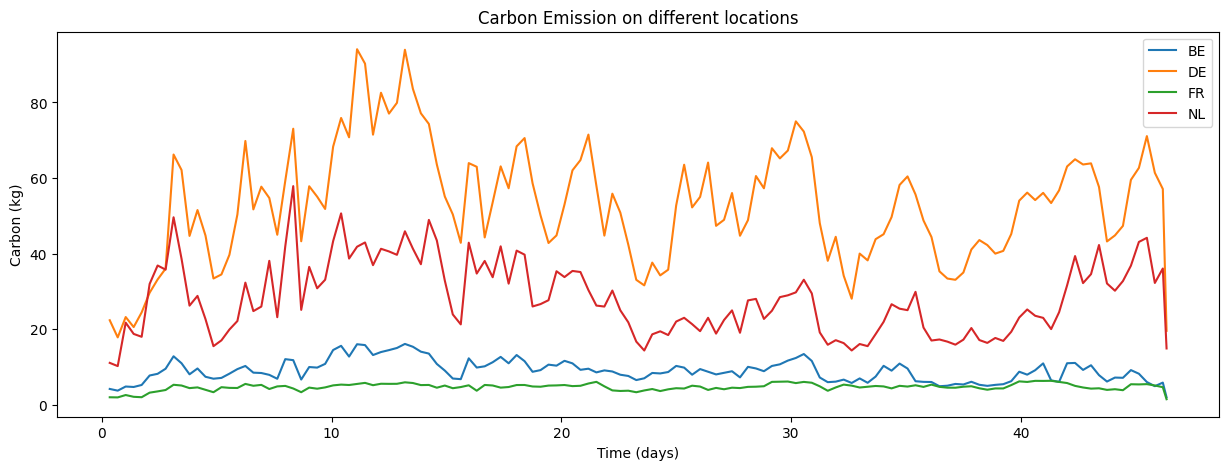

In [4]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_power_be.timestamp/1000/60/60/24, df_power_be.carbon_emission / 1000, label="BE")
ax.plot(df_power_de.timestamp/1000/60/60/24, df_power_de.carbon_emission / 1000, label="DE")
ax.plot(df_power_fr.timestamp/1000/60/60/24, df_power_fr.carbon_emission / 1000, label="FR")
ax.plot(df_power_nl.timestamp/1000/60/60/24, df_power_nl.carbon_emission / 1000, label="NL")

plt.title("Carbon Emission on different locations")
ax.legend()

plt.xlabel("Time (days)")
plt.ylabel("Carbon (kg)")

plt.show()

#### It is clear that location has a great impact on the carbon emission